In [1]:
import pandas as pd
import seaborn as sns

In [5]:
titanic = pd.read_csv('../data/train.csv')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

# 1. Scatterplot (Num-Num)

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

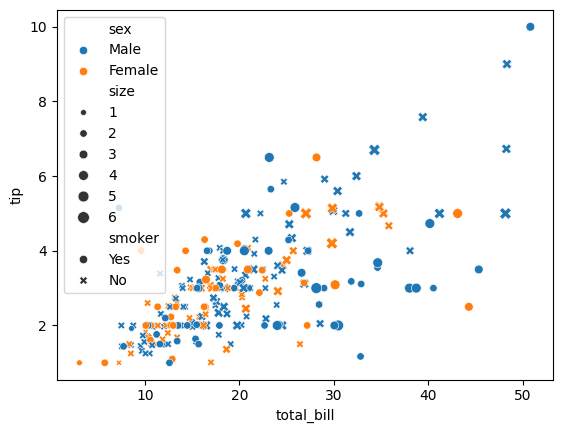

In [ ]:
# sns.scatterplot(x=tips['total_bill'],y=tips['tip']) #--> Bivariate
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])#--> Multivariate


# 2. Barplot (Num-Cat)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

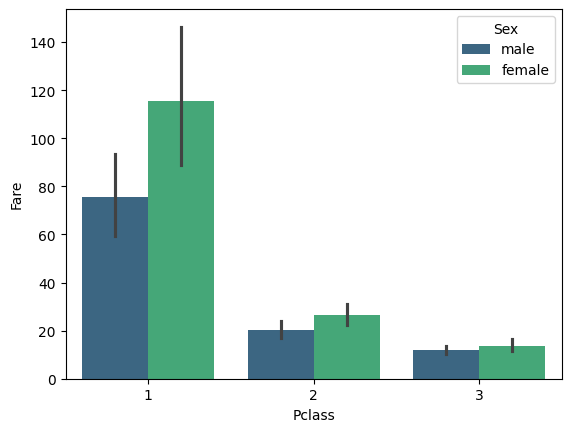

In [25]:
sns.barplot(x=titanic['Pclass'],y=titanic['Fare'],hue=titanic['Sex'],palette='viridis')#--> x axis Cat & y axis Num
# the line between the bars is confidence interval

# 3. Boxplot (Num-Cat)

<Axes: xlabel='Sex', ylabel='Age'>

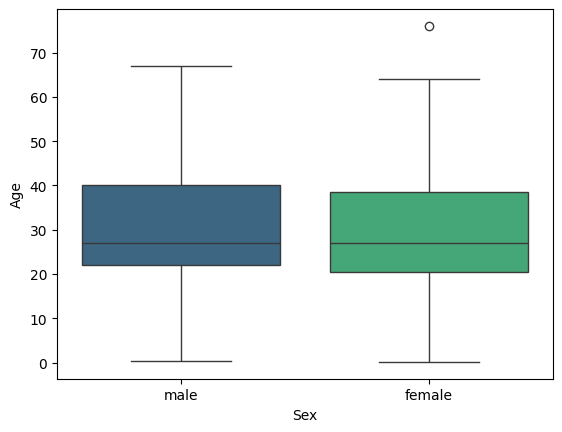

In [30]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Sex'],palette='viridis')

# 4. Distplot (Num-Cat)

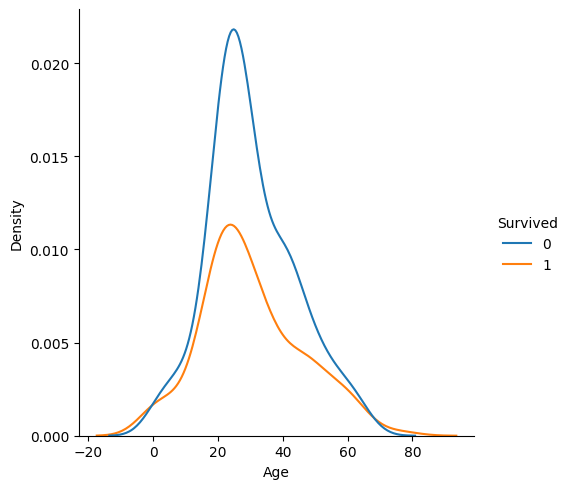

In [33]:
sns.displot(x=titanic['Age'],hue=titanic['Survived'],kind='kde')

# 5. Heatmap(Cat-Cat)

<Axes: xlabel='Pclass', ylabel='Survived'>

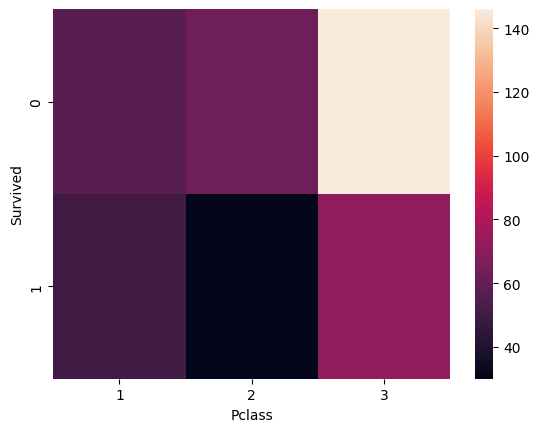

In [42]:
# pd.crosstab(titanic['Survived'],titanic['Pclass'])
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Pclass']))

# 6. Cluster Map (Cat-Cat)

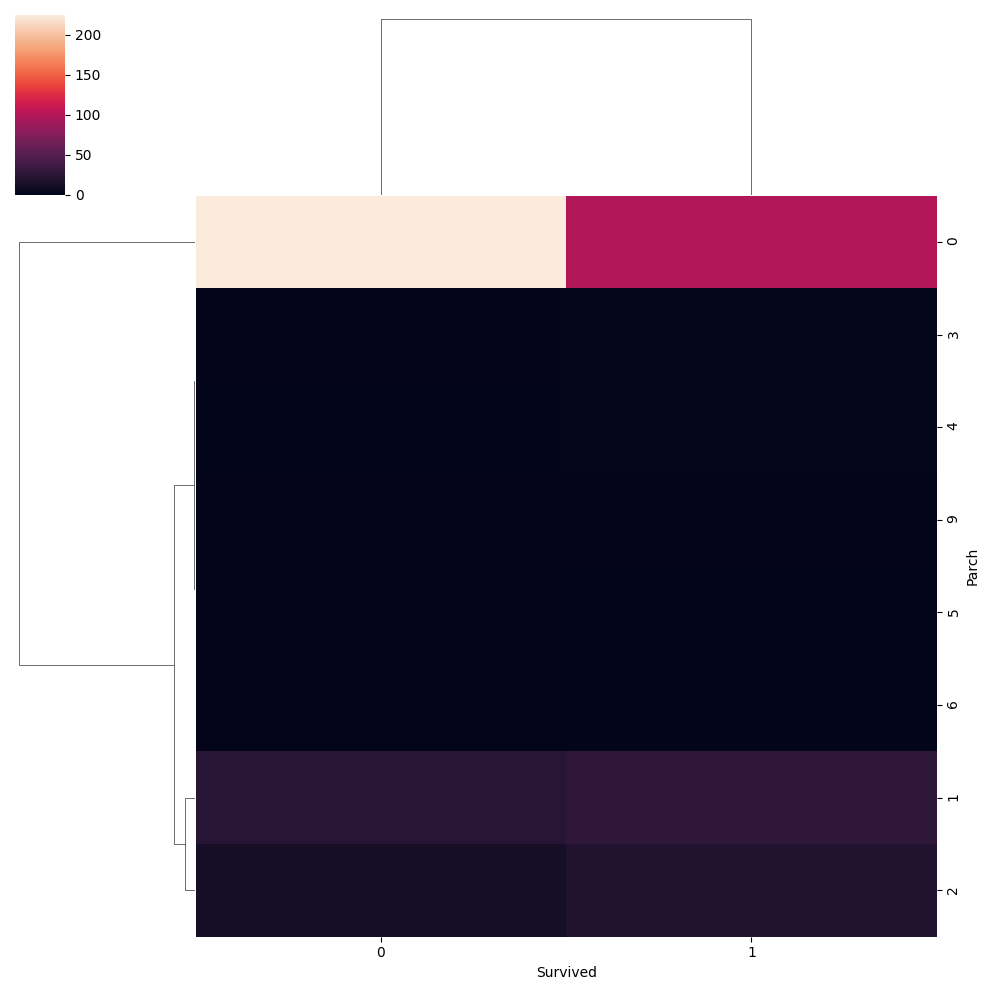

In [52]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

# 7. Pair Plot 

In [54]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


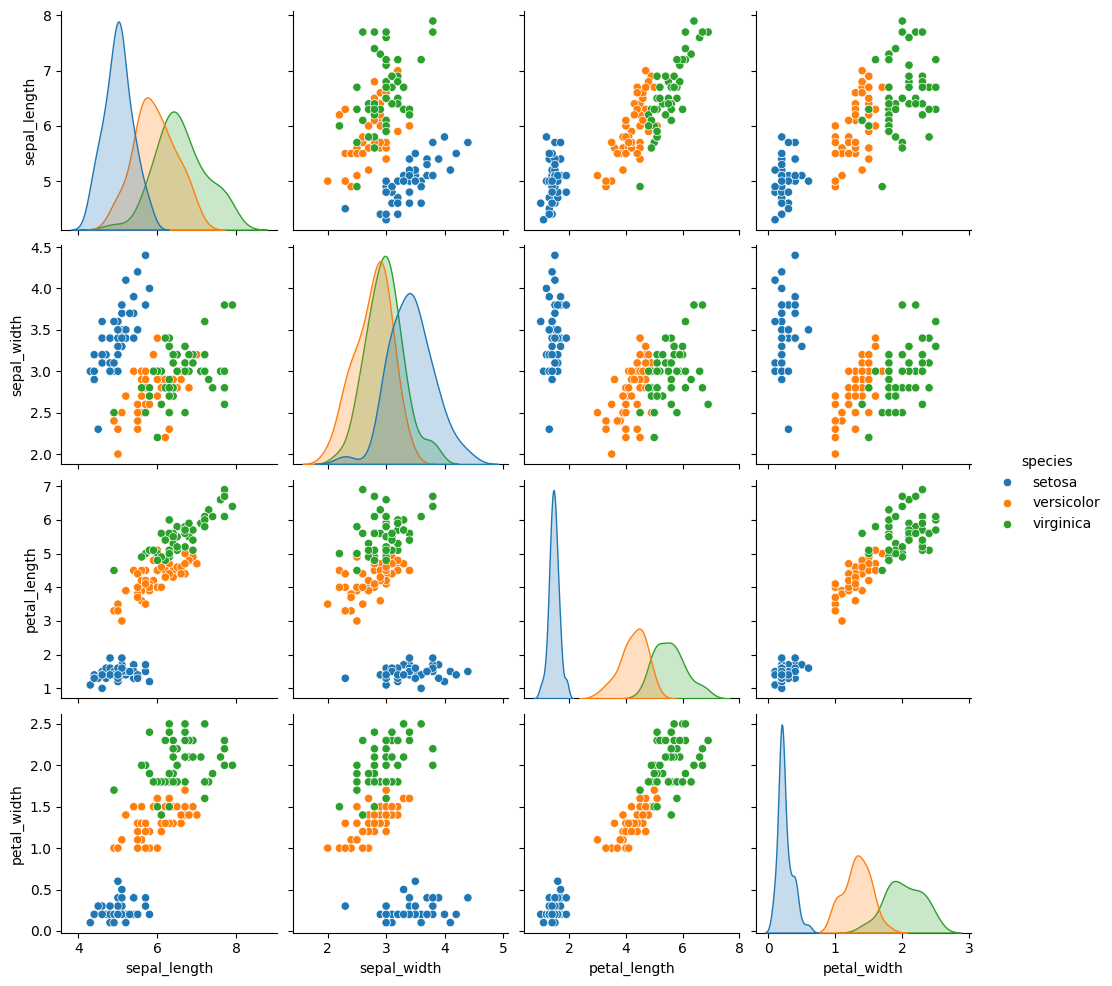

In [53]:
sns.pairplot(iris,hue='species')

# Line Plot (Num-Num)

In [55]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='year', ylabel='passengers'>

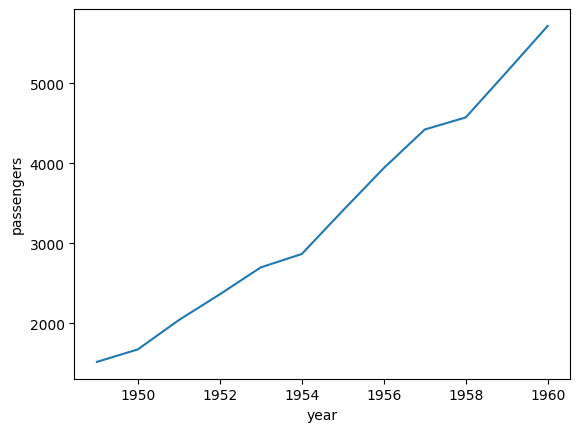

In [61]:
# Line plot is used where one column data is time based
new = flights.groupby('year')['passengers'].sum().reset_index()
sns.lineplot(x=new['year'],y=new['passengers'])#--> x axis time based entity


In [ ]:
# titanic.groupby('Pclass').mean(numeric_only=True)['Survived']*100
# titanic.groupby('Sex').mean(numeric_only=True)['Survived']*100
# titanic.groupby('Embarked').mean(numeric_only=True)['Survived']*100

Embarked
C    39.215686
Q    52.173913
S    32.592593
Name: Survived, dtype: float64

# Heat Map for flights dataset


In [64]:
flights.pivot_table(values='passengers',index='month',columns='year',observed=False)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

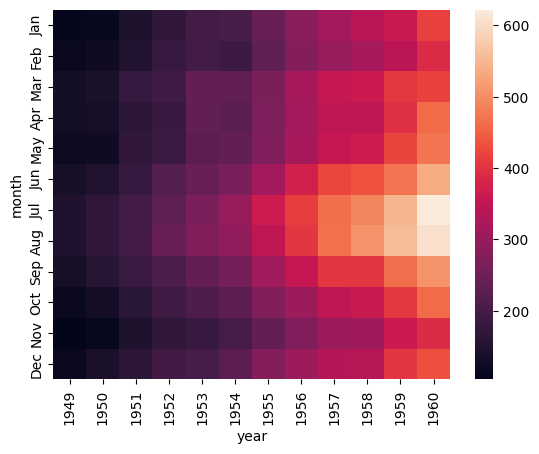

In [65]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year',observed=False))